In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading Dataset
heart=pd.read_csv('/content/heart_disease_data.csv', na_values=[' ','.',',','/','?','null','na'])
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart.sample(4) # For random sample selection

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
253,67,1,0,100,299,0,0,125,1,0.9,1,2,2,0
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3,0


In [ ]:
heart['target'].value_counts() # Checking imbalance of class

1    165
0    138
Name: target, dtype: int64

In [ ]:
heart[heart.duplicated()==True] # Checking duplicate rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
# dropping duplicate value
heart.drop_duplicates(inplace=True,ignore_index=True)
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [ ]:
heart.isna().sum() # Checking null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# EDA

In [ ]:
num_columns=list(heart.select_dtypes(exclude=['object']).columns)

In [ ]:
cat_columns=list(heart.select_dtypes(include=['object']).columns)

In [ ]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


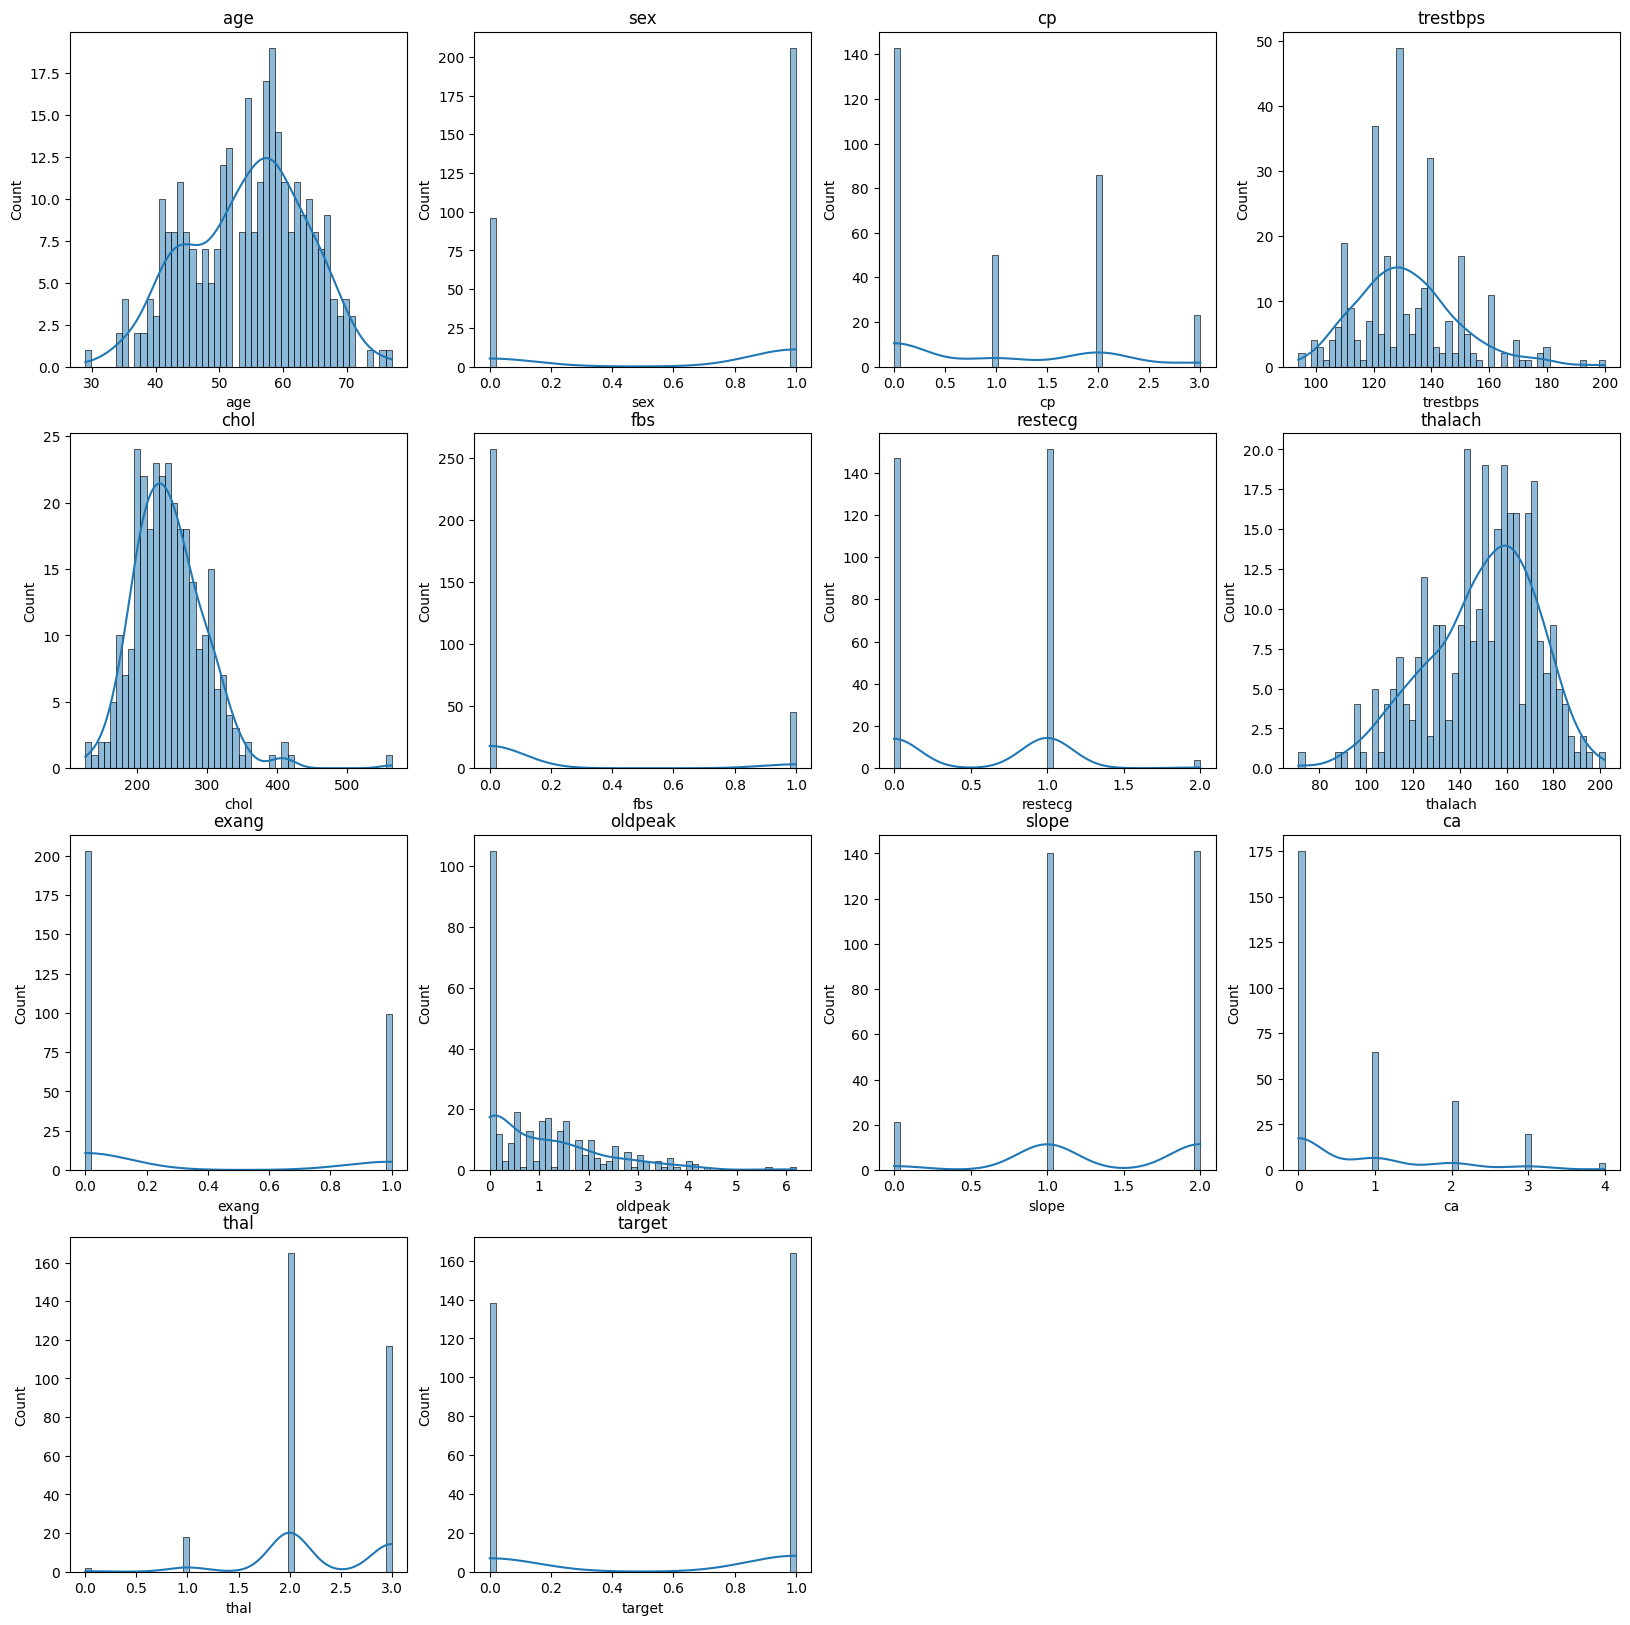

In [ ]:
# Distribution of features
plt.figure(figsize=(20,20))
for i,v in enumerate(num_columns):
  plt.subplot(4,4,i+1)
  sns.histplot(heart[v],stat='count',kde=True,bins=50)
  plt.title(v)

In [ ]:
for i in range(heart.shape[0]):
  if heart.loc[i,'target']==1:
    heart.loc[i,'disease']='Yes'
  else:
    heart.loc[i,'disease']='No'

heart.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,disease
244,48,1,0,124,274,0,0,166,0,0.5,1,0,3,0,No
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2,1,Yes
272,58,1,0,100,234,0,1,156,0,0.1,2,1,3,0,No
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2,1,Yes
80,41,1,2,112,250,0,1,179,0,0.0,2,0,2,1,Yes


In [ ]:
for i in range(heart.shape[0]):
  if heart.loc[i,'sex']==1:
    heart.loc[i,'gender']='male'
  else:
    heart.loc[i,'gender']='female'

heart.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,disease,gender
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1,Yes,male
45,52,1,1,120,325,0,1,172,0,0.2,2,0,2,1,Yes,male
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2,1,Yes,male
212,61,0,0,145,307,0,0,146,1,1.0,1,0,3,0,No,female
187,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0,No,male


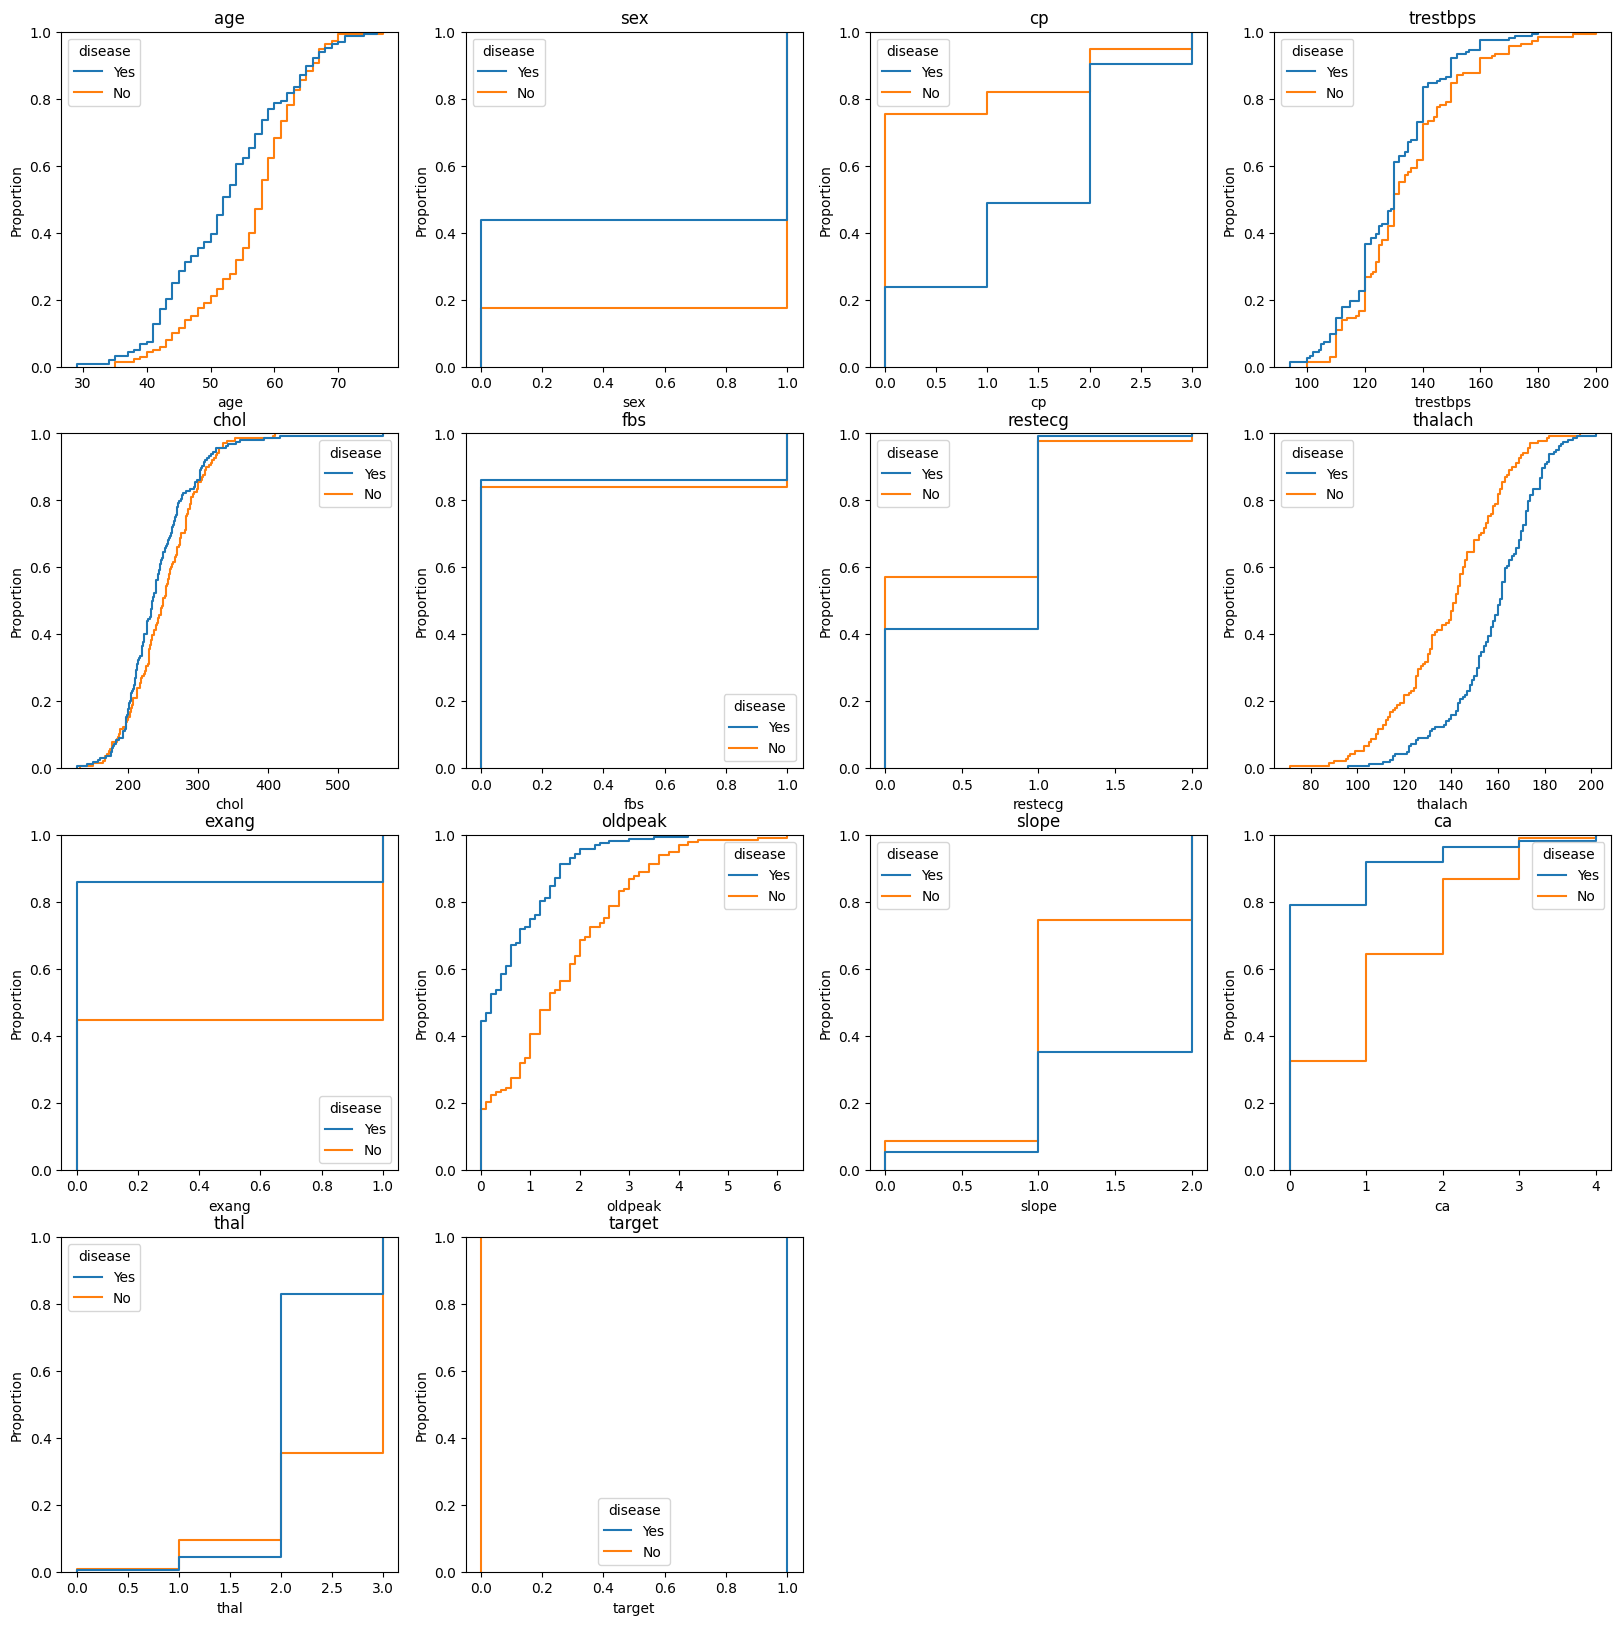

In [ ]:
# Distribution of features - ECDF Plot
plt.figure(figsize=(20,20))
for i,v in enumerate(num_columns):
  plt.subplot(4,4,i+1)
  sns.ecdfplot(heart,x=v,stat='proportion',hue='disease')
  plt.title(v)

<ipython-input-28-ca9c3112529b>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(heart,x=v,hue='disease')


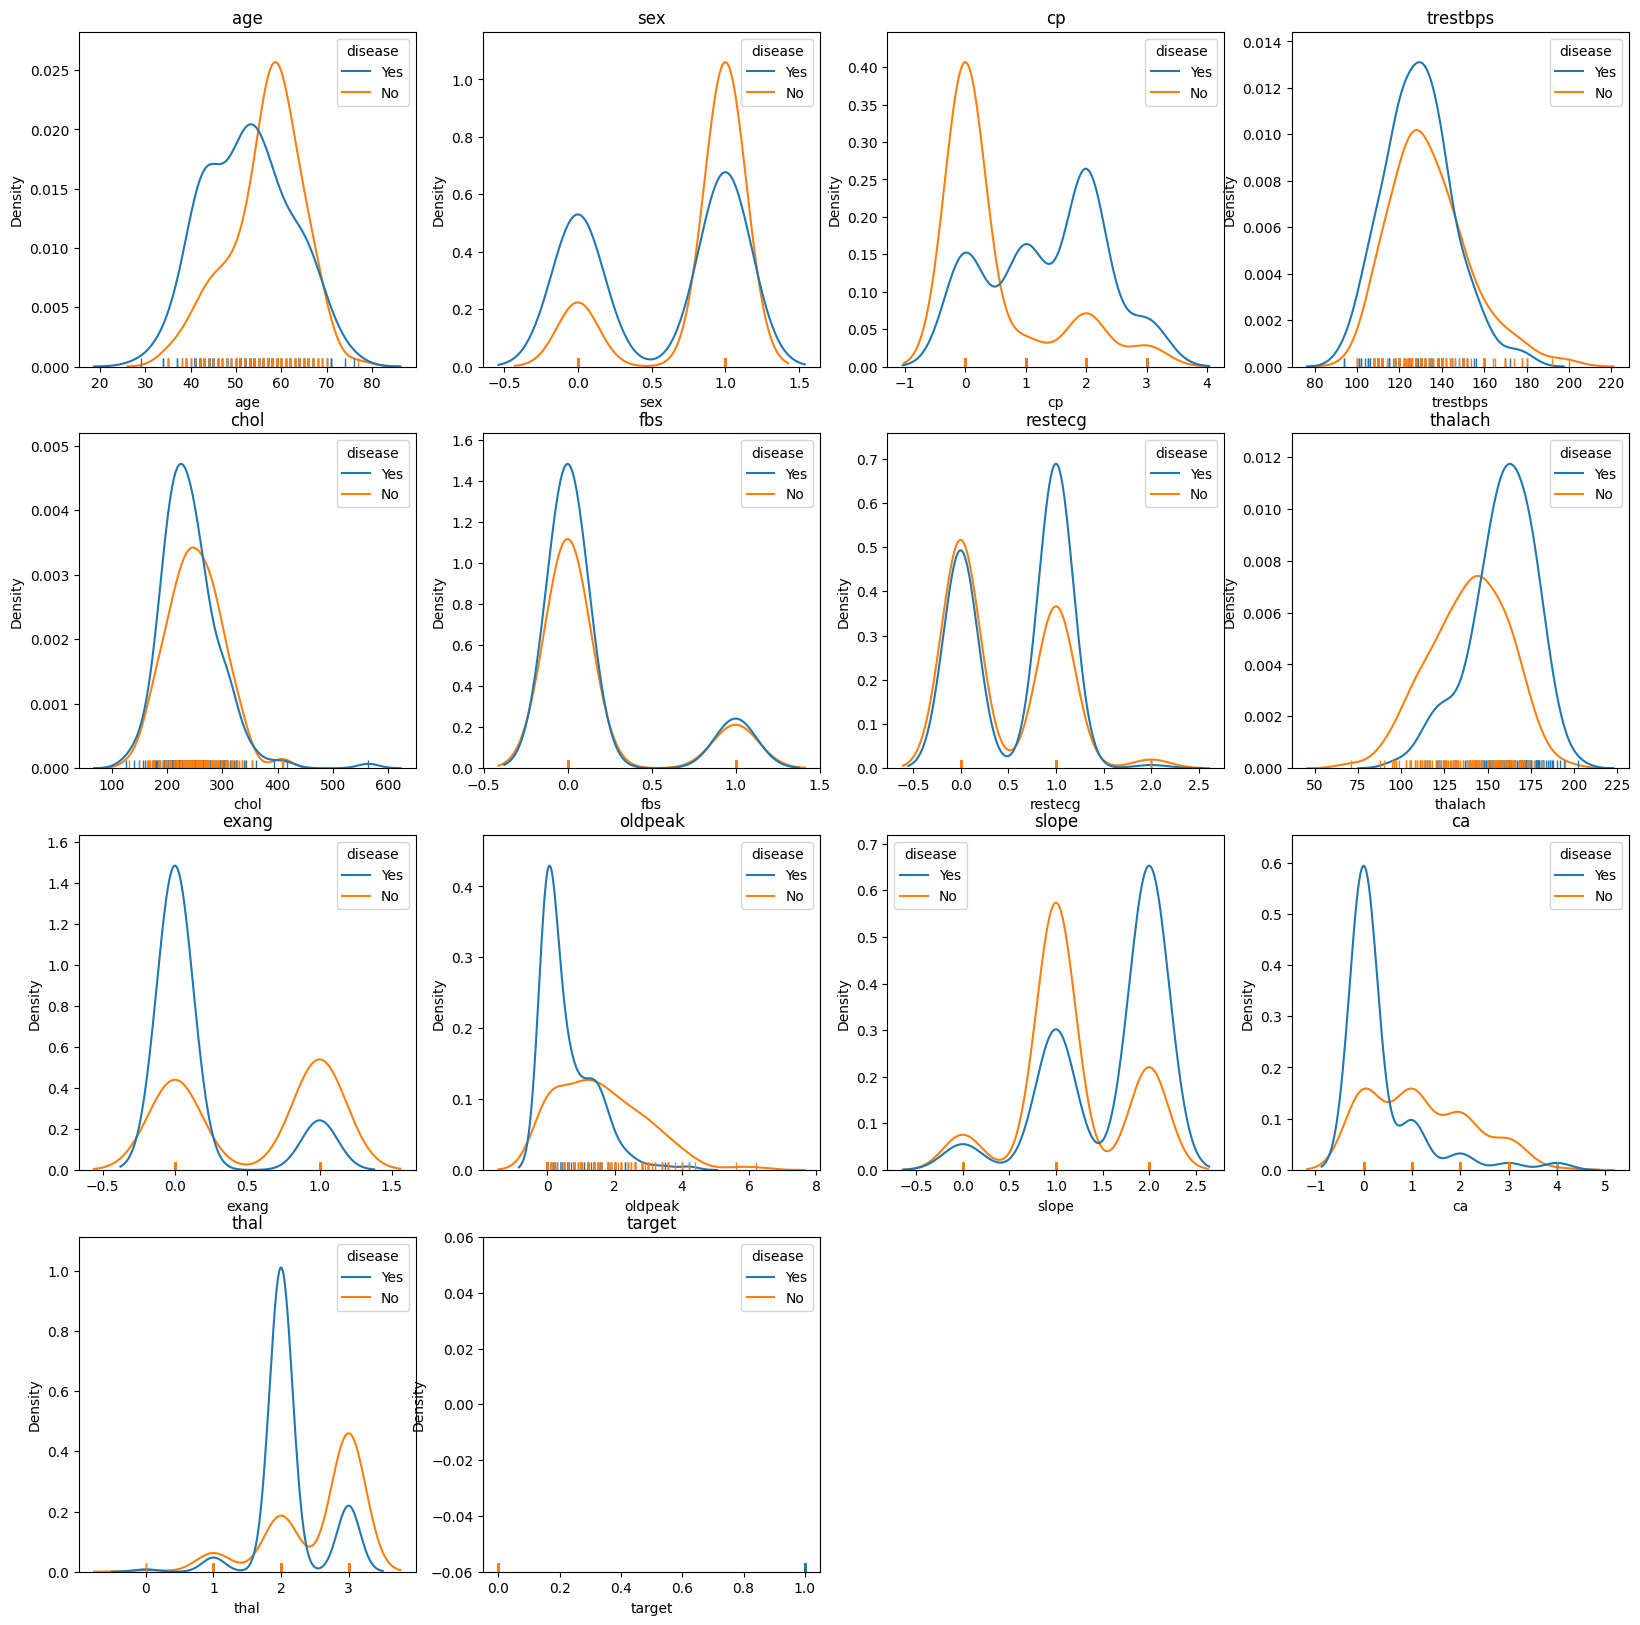

In [ ]:
# Distribution of features - KDE Plot
plt.figure(figsize=(20,20))
for i,v in enumerate(num_columns):
  plt.subplot(4,4,i+1)
  sns.kdeplot(heart,x=v,hue='disease')
  sns.rugplot(heart,x=v,hue='disease')
  plt.title(v)

In [ ]:
print('No. of Female who have disease',heart[(heart['target']==1)&(heart['sex']==0)].shape[0])
print("No. of Female who don't have disease",heart[(heart['target']==0)&(heart['sex']==0)].shape[0])

No. of Female who have disease 72
No. of Female who don't have disease 24


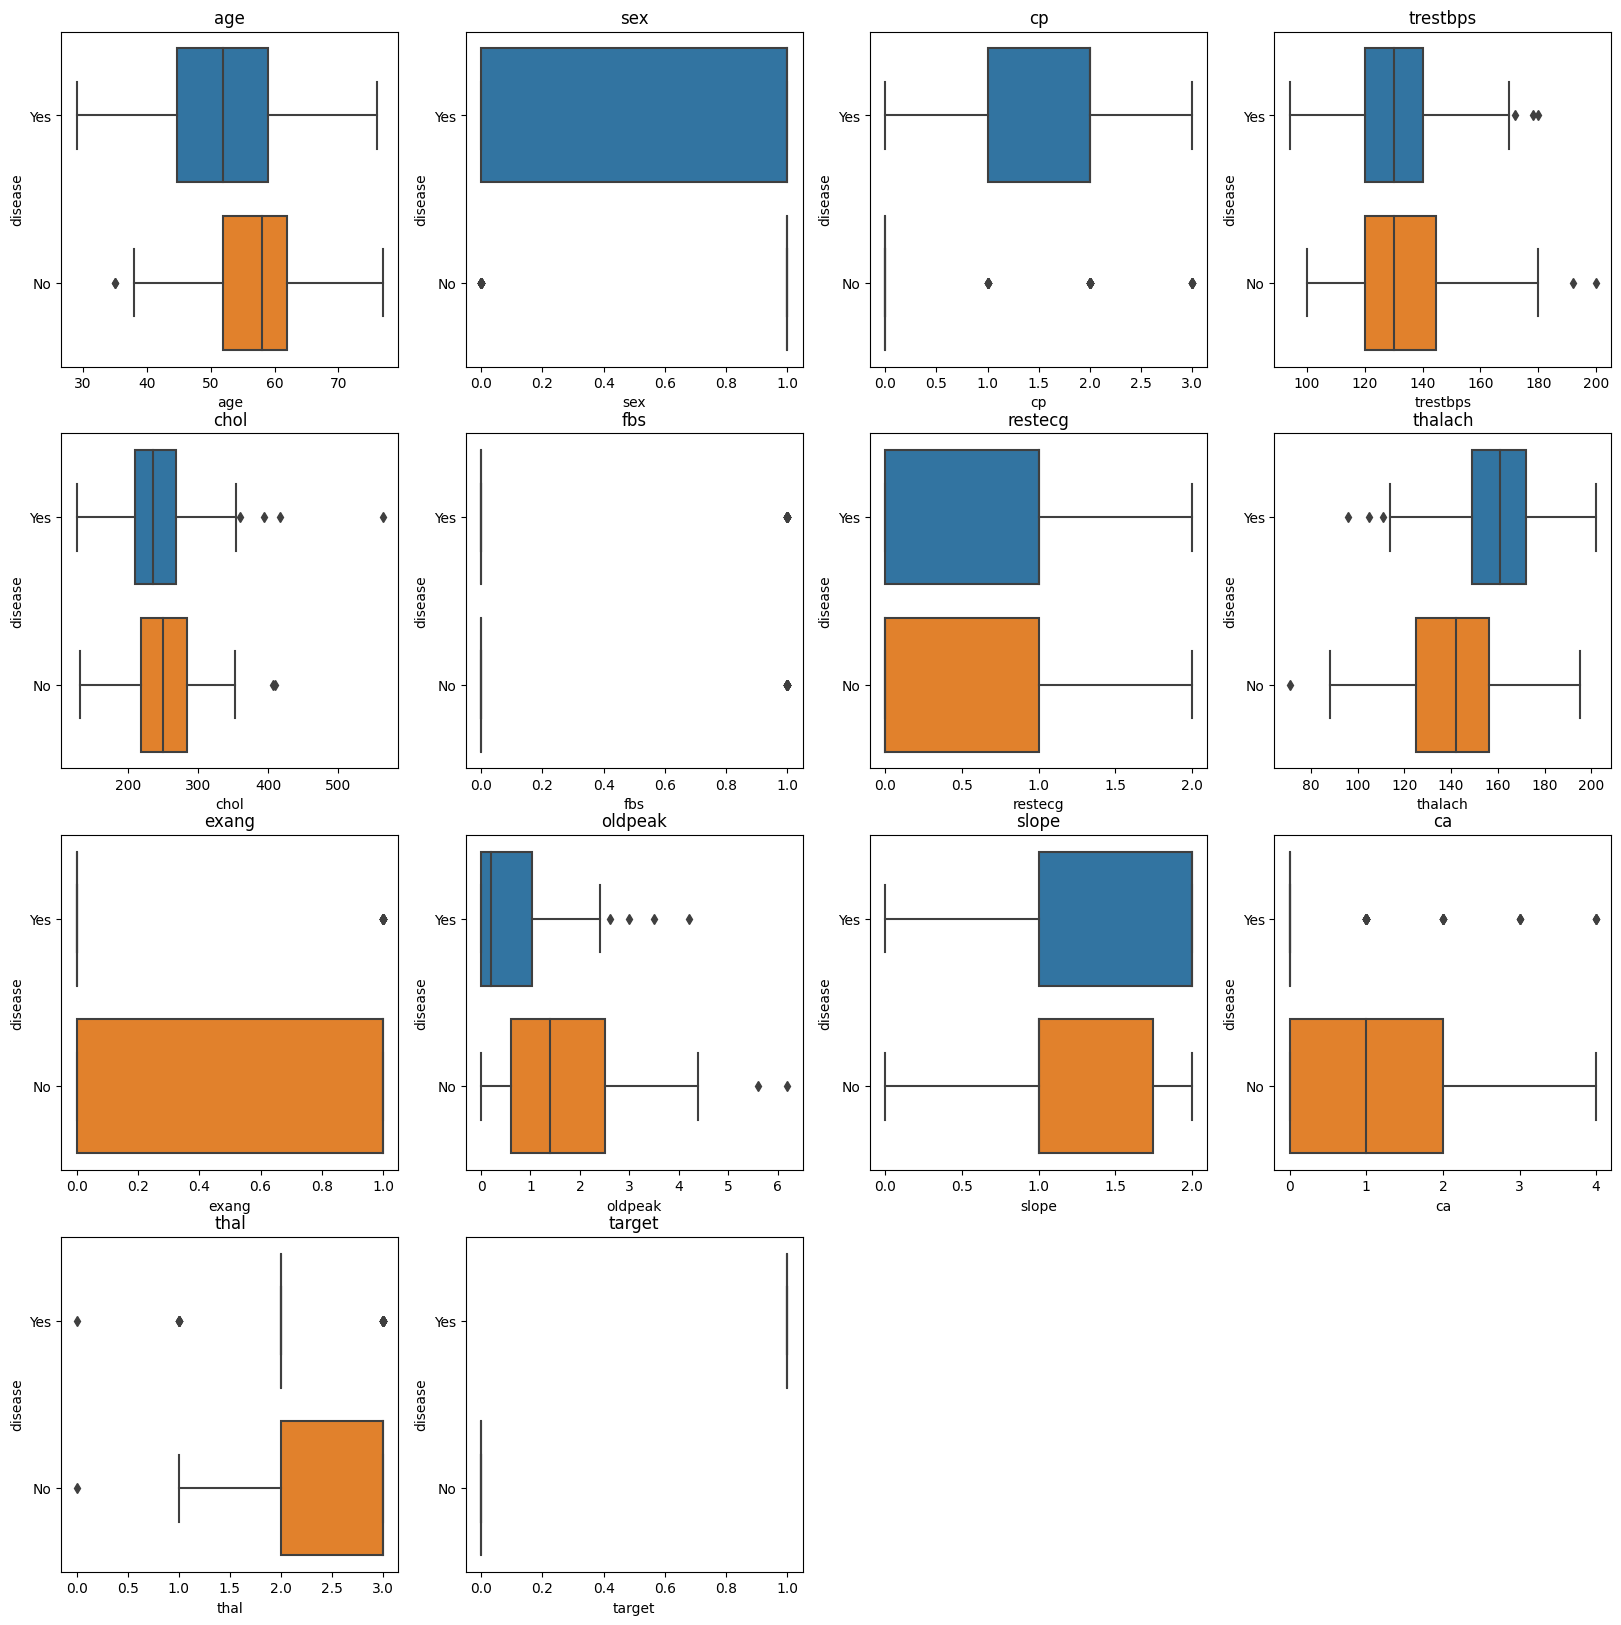

In [ ]:
# Finding relation b/w categorical and numerical feature - Box Plot
plt.figure(figsize=(20,20))
for i,v in enumerate(num_columns):
  plt.subplot(4,4,i+1)
  sns.boxplot(heart,x=v,y='disease')
  plt.title(v)

In [ ]:
heart[heart['target']==0]['cp'].value_counts()

0    104
2     18
1      9
3      7
Name: cp, dtype: int64

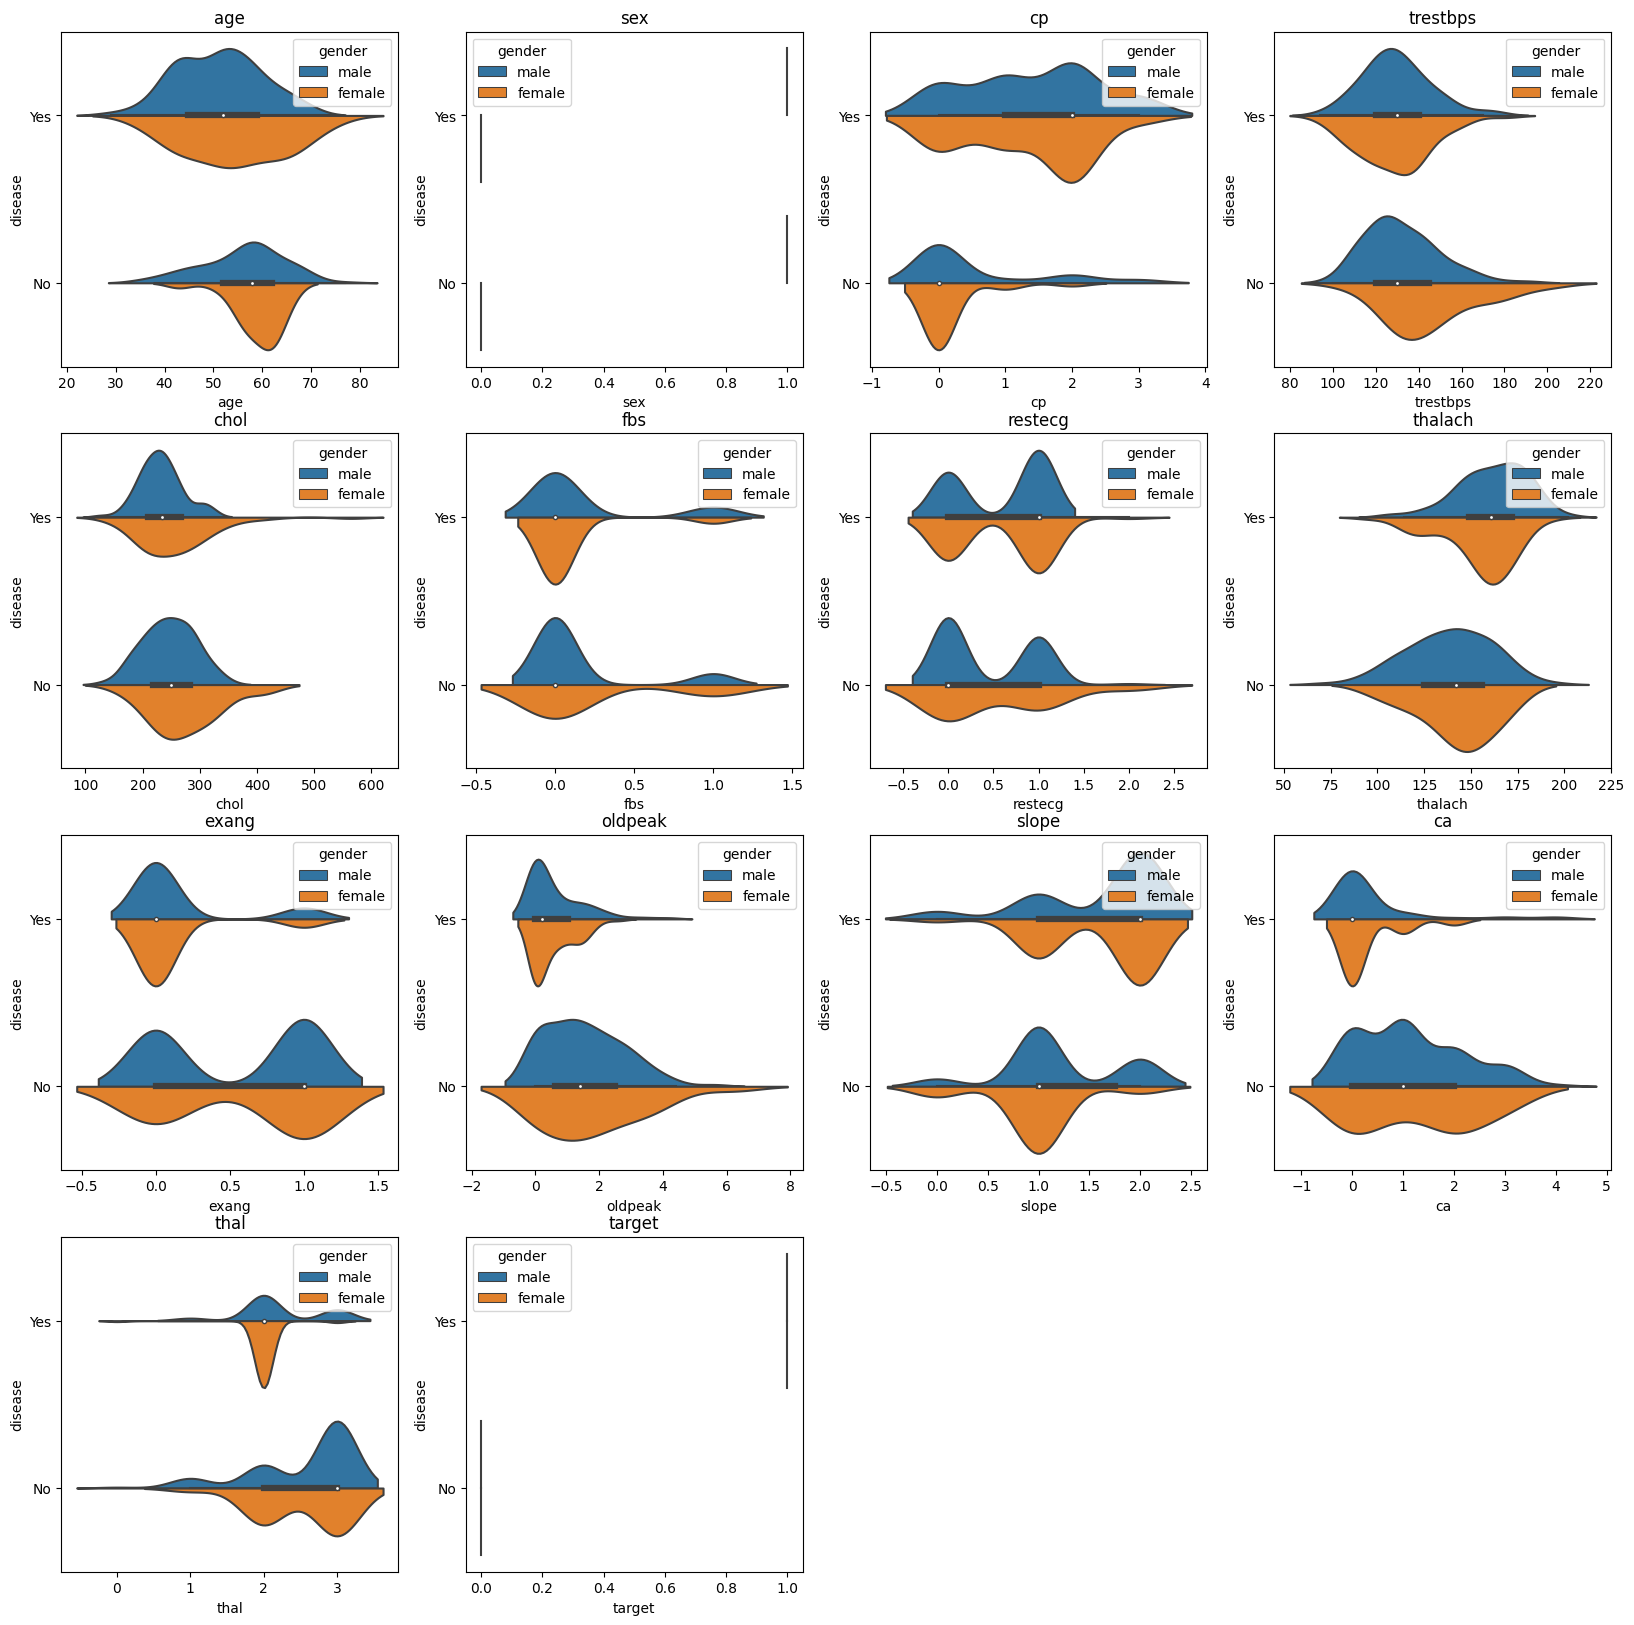

In [ ]:
# Finding relation b/w categorical and numerical feature - Violin Plot
plt.figure(figsize=(20,20))
for i,v in enumerate(num_columns):
  plt.subplot(4,4,i+1)
  sns.violinplot(heart,x=v,y='disease',hue='gender',split=True)
  plt.title(v)

<Axes: xlabel='age', ylabel='Count'>

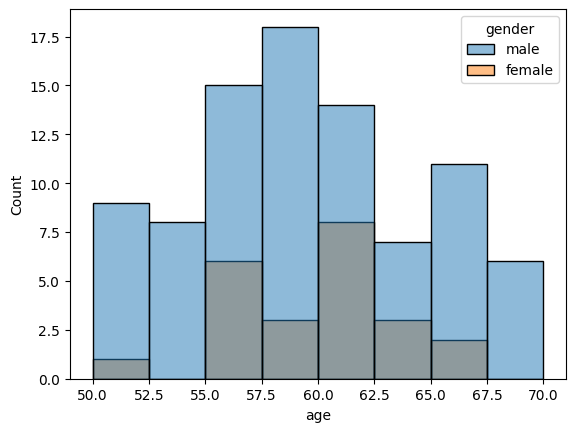

In [ ]:
sns.histplot(heart[(heart['disease']=='No')&(heart['age']>=50)&(heart['age']<=70)],x='age',hue='gender')

In [ ]:
heart.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,disease,gender
229,47,1,2,108,243,0,1,152,0,0.0,2,0,2,0,No,male
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1,Yes,female
218,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0,No,male
135,49,0,0,130,269,0,1,163,0,0.0,2,0,2,1,Yes,female
271,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0,No,male


In [ ]:
heart_1=heart.drop(['disease','gender'],axis=1)

In [ ]:
heart_1.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
219,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
191,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
x=pd.DataFrame(heart_1.iloc[:,0:-1],columns=num_columns[0:-1])
y=heart_1.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=50)
print(x_train.shape,y_train.shape)

(271, 13) (271,)


In [ ]:
x_train[0:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
273,47,1,0,110,275,0,0,118,1,1.0,1,1,2
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2
182,58,1,2,112,230,0,0,165,0,2.5,1,1,3
188,41,1,0,110,172,0,0,158,0,0.0,2,0,3


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

In [ ]:
cmodel=DecisionTreeClassifier(max_depth=10,splitter='best',min_samples_split=5)
cmodel.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5)

In [ ]:
y_pred=cmodel.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79        13
           1       0.88      0.78      0.82        18

    accuracy                           0.81        31
   macro avg       0.80      0.81      0.80        31
weighted avg       0.82      0.81      0.81        31



In [ ]:
cfm=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))

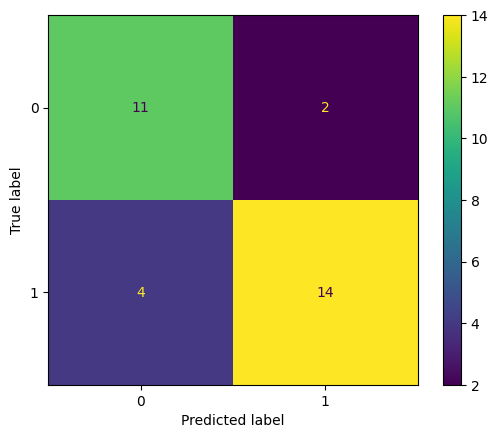

In [ ]:
cfm.plot()

In [ ]:
precision_score(y_test,y_pred,average=None)

array([0.78571429, 0.88235294])

In [ ]:
recall_score(y_test,y_pred,average=None)

array([0.84615385, 0.83333333])

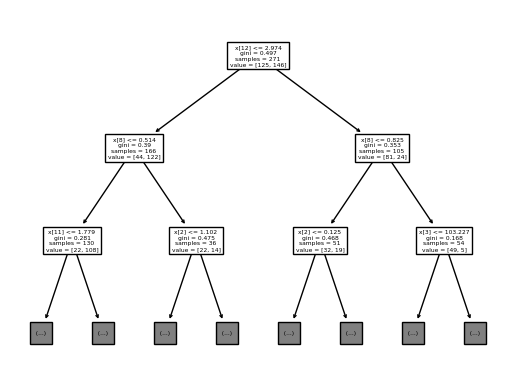

In [ ]:
from sklearn.tree import plot_tree
plot_tree(cmodel,max_depth=2)
plt.show()